In [1]:
#Import Python packages that are used for the land use analysis.
%matplotlib inline
import datacube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from deafrica_tools.plotting import display_map, plot_lulc

In [2]:
#Connect to datacube for storing landuse and landcover
dc = datacube.Datacube(app="Landcover_Classification")

In [3]:
#Load product ESRI Global landuse and landcover
product_name = ['io_lulc'] 
dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
io_lulc,data,data,uint8,1,0.0,[classification]


In [4]:
#Define study area location
lat, lon = 0.632055, 36.05672
buffer = 0.15
#resample so we can view a large area
measurements='classification'
#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

In [5]:
#create reusable datacube query object
query = {
    'time': ('2021-10'),
    'x': lons,
    'y': lats,
    'resolution':(-10,10),
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the data
ds_esri = dc.load(product='io_lulc', **query).squeeze()
print(ds_esri)

<xarray.Dataset>
Dimensions:         (y: 3828, x: 2896)
Coordinates:
    time            datetime64[ns] 2021-07-02T12:00:00
  * y               (y) float64 9.976e+04 9.976e+04 ... 6.15e+04 6.15e+04
  * x               (x) float64 3.465e+06 3.465e+06 ... 3.493e+06 3.493e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 11 11 11 11 11 11 11 11 11 ... 2 2 2 2 2 2 2 2
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


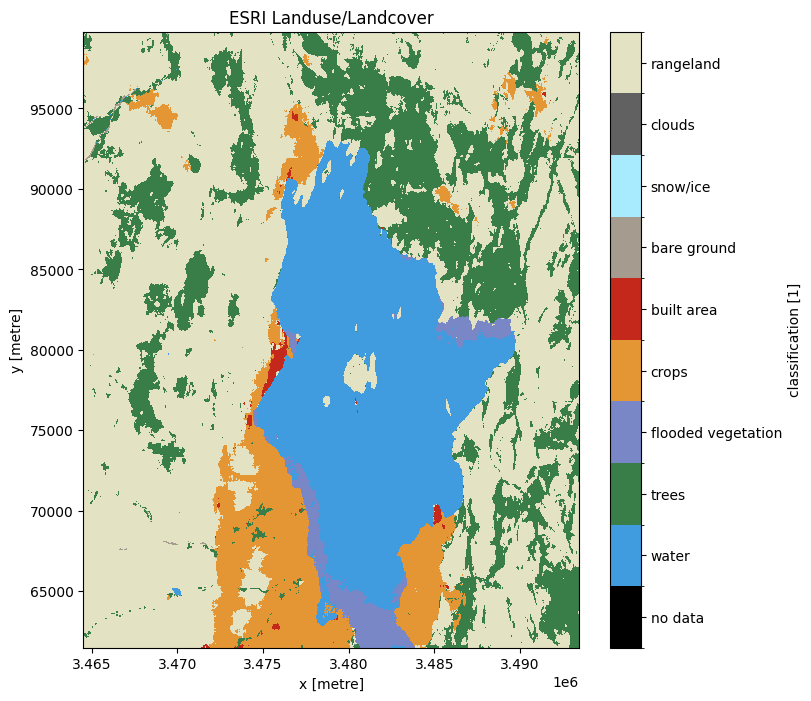

In [7]:
#Plot landuse and landcover
fig, ax = plt.subplots(figsize=(8, 8), sharey=True)
plot_lulc(ds_esri["classification"], product="IO", legend=True, ax=ax)
plt.title("ESRI Landuse/Landcover");

In [13]:
# in metres, refers to resolution we defined above (-10,10)
pixel_length = query["resolution"][1]
# conversion from metres to kilometres
m_per_km = 1000
area_per_pixel = pixel_length**2 / m_per_km**2
#calculate the area of each area class
ds_esri_area = np.array(ds_esri_counts[1] * area_per_pixel)

In [17]:
#Show landuse area in each class
ds_esri_area

array([220.7259, 204.4843,  22.0738,  95.6148,   3.5895,   0.6492,
       561.4513])

In [18]:
# list of classes actually in the map
esri_classes = ['water', 'trees', 'flooded veg', 'crops',
              'built area', 'bare ground', 'rangeland']

Text(0, 0.5, 'LULC area (km$^2$)')

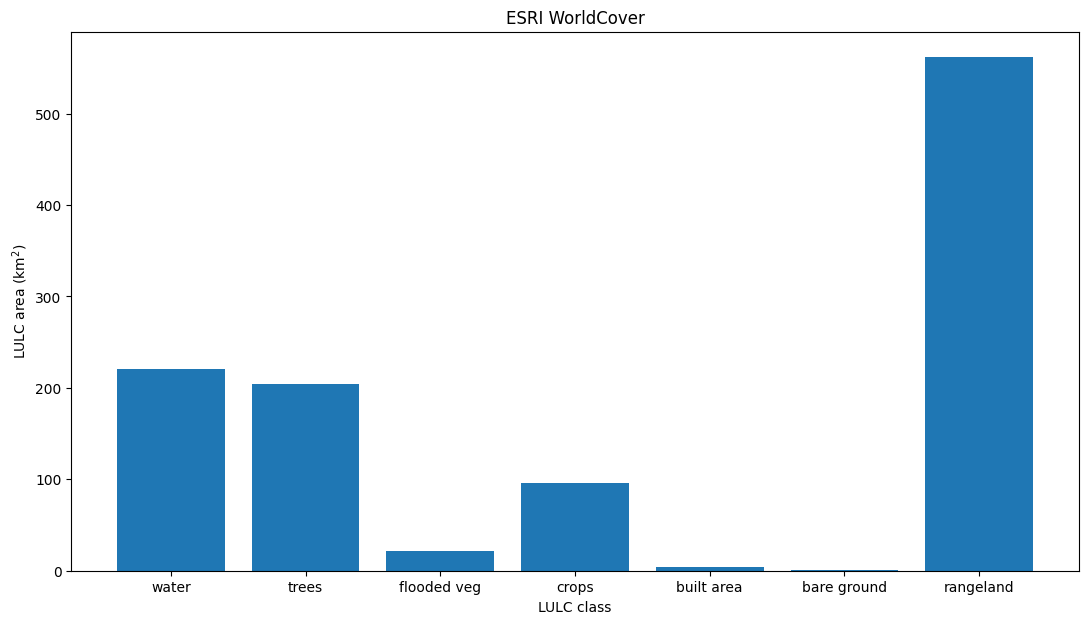

In [19]:
fig,ax=plt.subplots(figsize=(13,7))

#plot worldcover
plt.bar(esri_classes, ds_esri_area)
plt.title('ESRI WorldCover')
plt.xlabel('LULC class')

plt.ylabel('LULC area (km$^2$)')